In [ ]:
#We are analyzing a dataset from instacart, a grocery delivery platform where customers order groceries online and have them delivered to them.
#For this project our goal is to clean up and prepare the data from the report that gives insights to shopping habits of instacart customers.
#There are 5 different tables in the dataset we are using.  The first one is instacart_orders where each row corresponds to one order on the instacart app.
#The second is a products, where each row corresponds to a unique product that customers can buy.
#The third one is order_products which corresponds to one item placed in an order.
#The fourth one is aisles which represents the unique ID number for each aisle and the name of the aisle.
#The fifth one is departments which represents the unique ID for each grocery department and its name.
#I will reach my goal by using various sorting and filtering techniques to gather the data required.   From there I will be using graphs and charts to get answers to the questions asked and to visually see the data.



In [2]:
import pandas as pd
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
print(instacart_orders)
instacart_orders.info()

order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
print(order_products)
instacart_orders.info()


products = pd.read_csv('/datasets/products.csv', sep=';')
print(products)
products.info()

aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
print(aisles)
aisles.info()

departments = pd.read_csv('/datasets/departments.csv', sep=';')
print(departments)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [3]:
#Looking at the data we have 5 seperate spreadsheets to gather data from.  The main one is instacart_orders which details every where but that connects to the order_products table which connects to the products table which connects to the aisles and departments table.

In [ ]:
# Check for duplicated orders
duplicates = instacart_orders[instacart_orders.duplicated(subset='order_id', keep=False)]
print(duplicates)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
164581   1112182   202304            84          3                  2   
200059   1782114   106752             1          3                  2   
204042   2125197    14050            48          3                  2   
215294   2160484   107525            16          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
242618   1021560    53767             3          3                  2   
250626    467134    63189            21          3 

In [ ]:
# Check for all orders placed Wednesday at 2:00 AM
wednesday_2am_orders = instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)]
print(wednesday_2am_orders)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

In [ ]:
# Remove duplicate orders
instacart_orders_cleaned = instacart_orders.drop_duplicates(subset='order_id', keep='first')
print(instacart_orders_cleaned)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [ ]:
# Double check for duplicate rows
instacart_orders_cleaned = instacart_orders_cleaned[instacart_orders_cleaned.duplicated(keep=False)]
print(instacart_orders_cleaned)


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [ ]:
# Double check for duplicate order IDs only
instacart_orders_cleaned = instacart_orders_cleaned[instacart_orders_cleaned.duplicated(subset='orders_id', keep=False)]
print(instacart_orders_cleaned)

#The data has been cleaned from duplicates and doucle checked by filtering out duplicates then creating a new cleaned dataset and looking for duplicates again.

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [ ]:
# Check for fully duplicate rows
duplicates = products[products.duplicated(keep=False)]
print(duplicates)


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [ ]:
# Check for just duplicate product IDs
duplicates = products[products.duplicated(subset='product_id', keep=False)]
print(duplicates)


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [ ]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name_lower'] = products['product_name'].str.lower()
duplicate_products = products[products.duplicated(subset='product_name', keep=False)]
print(duplicate_products)


       product_id product_name  aisle_id  department_id product_name_lower
37             38          NaN       100             21                NaN
71             72          NaN       100             21                NaN
109           110          NaN       100             21                NaN
296           297          NaN       100             21                NaN
416           417          NaN       100             21                NaN
...           ...          ...       ...            ...                ...
49552       49553          NaN       100             21                NaN
49574       49575          NaN       100             21                NaN
49640       49641          NaN       100             21                NaN
49663       49664          NaN       100             21                NaN
49668       49669          NaN       100             21                NaN

[1258 rows x 5 columns]


In [ ]:
# Check for duplicate product names that aren't missing
products_non_nan = products[products['product_name_lower'].notna()]
duplicate_products = products_non_nan[products_non_nan.duplicated(subset='product_name_lower', keep=False)]
print(duplicate_products)

       product_id                                     product_name  aisle_id  \
41             42                                  Biotin 1000 mcg        47   
185           186       Fresh Scent Dishwasher Detergent with Dawn        74   
515           516                           American Cheese Slices        21   
1538         1539                                 Cauliflower head        83   
1783         1784              NUTrition Protein Mix Blueberry Nut       117   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id                   

In [13]:
duplicates_departments = departments[departments.duplicated(keep=False)]
print(duplicates_departments)

Empty DataFrame
Columns: [department_id, department]
Index: []


In [14]:
print(departments)
departments.info()

    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 

### `aisles` data frame

In [15]:
duplicates_aisles = aisles[aisles.duplicated(keep=False)]
print(duplicates_aisles)

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [16]:
print(aisles)
aisles.info()

     aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


### `order_products` data frame

In [17]:
duplicates = order_products[order_products.duplicated(keep=False)]
print(duplicates)# Check for fullly duplicate rows


Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [18]:
# Double check for any other tricky duplicates
partial_duplicates = order_products[order_products.duplicated(subset=['order_id', 'product_id'], keep=False)]
duplicates = order_products[order_products.duplicated(keep=False)]
print(partial_duplicates)
print()
print(duplicates)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


## Find and remove missing values


### `products` data frame

In [ ]:
# Are all of the missing product names associated with aisle ID 100?
#both dataframes have 1258 rows so all missing product names are in aisle 100
missing_product_names = products[products['product_name'].isna()]
missing_with_aisle_100 = missing_product_names[missing_product_names['aisle_id'] == 100]
print(missing_product_names)
print(missing_with_aisle_100)


       product_id product_name  aisle_id  department_id product_name_lower
37             38          NaN       100             21                NaN
71             72          NaN       100             21                NaN
109           110          NaN       100             21                NaN
296           297          NaN       100             21                NaN
416           417          NaN       100             21                NaN
...           ...          ...       ...            ...                ...
49552       49553          NaN       100             21                NaN
49574       49575          NaN       100             21                NaN
49640       49641          NaN       100             21                NaN
49663       49664          NaN       100             21                NaN
49668       49669          NaN       100             21                NaN

[1258 rows x 5 columns]
       product_id product_name  aisle_id  department_id product_name_lower


In [ ]:
# Are all of the missing product names associated with department ID 21?
missing_product_names = products[products['product_name'].isna()]
missing_with_department_21 = missing_product_names[missing_product_names['department_id'] == 21]
print(missing_product_names)
print(missing_with_department_21)




       product_id product_name  aisle_id  department_id product_name_lower
37             38          NaN       100             21                NaN
71             72          NaN       100             21                NaN
109           110          NaN       100             21                NaN
296           297          NaN       100             21                NaN
416           417          NaN       100             21                NaN
...           ...          ...       ...            ...                ...
49552       49553          NaN       100             21                NaN
49574       49575          NaN       100             21                NaN
49640       49641          NaN       100             21                NaN
49663       49664          NaN       100             21                NaN
49668       49669          NaN       100             21                NaN

[1258 rows x 5 columns]
       product_id product_name  aisle_id  department_id product_name_lower


# both dataframes have 1258 columns so yes

In [21]:
print(aisles.columns)
aisle_name = aisles[aisles['aisle_id'] == 100]['aisle'].values[0]
department_name = departments[departments['department_id'] == 21]['department'].values[0]
print(f"The aisle is: {aisle_name} and the department is: {department_name}")# What is this ailse and department?


Index(['aisle_id', 'aisle'], dtype='object')
The aisle is: missing and the department is: missing


In [ ]:
# Fill missing aisle, department and product names with 'Unknown'
aisles['aisle'] = aisles['aisle'].replace('missing', 'Unknown')
aisle_100_row = aisles[aisles['aisle_id'] == 100]
departments['department'] = departments['department'].replace('missing', 'Unknown')
products = products.fillna('Unknown')
print(aisle_100_row)
print()
print(departments)
print(products)


    aisle_id    aisle
99       100  Unknown

    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          Unknown
       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                        

### `orders` data frame

In [23]:
print(instacart_orders_cleaned)
instacart_orders.info()

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [24]:
filtered_orders = instacart_orders_cleaned[instacart_orders_cleaned['order_number'] >= 2]
missing_values = filtered_orders.isna().sum()
print(missing_values)# Are there any missing values where it's not a customer's first order?


order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64


# There are no missing values where it was not a customers first order.

### `order_products` data frame

In [25]:
print(order_products)
order_products.info()

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440               17.0          0
1          567889        1560                1.0          1
2         2261212       26683                1.0          1
3          491251        8670               35.0          1
4         2571142        1940                5.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4545007 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_

In [ ]:
order_products.describe()# What are the min and max values in this column?  
min_order_id = order_products['order_id'].min()
max_order_id = order_products['order_id'].max()
min_product_id = order_products['product_id'].min()
max_product_id = order_products['product_id'].max()
min_add_to_cart_id = order_products['add_to_cart_order'].min()
max_add_to_cart_id = order_products['add_to_cart_order'].max()
print(min_order_id)
print(max_order_id)
print(min_product_id)
print(max_product_id)
print(min_add_to_cart_id)
print(max_add_to_cart_id)

4
3421079
1
49694
1.0
64.0


In [ ]:
orders_with_missing_cart_order = order_products[order_products['add_to_cart_order'].isna()]
print(orders_with_missing_cart_order)


         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [ ]:
#Save the IDs of the orders with missing 'add_to_cart_order' to a list
order_ids_with_missing_cart_order = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique().tolist()

#Select all entries attributed to those order IDs into a separate dataframe
orders_with_missing_cart_order_entries = order_products[order_products['order_id'].isin(order_ids_with_missing_cart_order)]

#Group this new dataframe by 'order_id' and find the minimum size of those groups
product_counts_per_order_with_missing = orders_with_missing_cart_order_entries.groupby('order_id').size()
min_product_count = product_counts_per_order_with_missing.min()

#Print the minimum number of products in orders with missing 'add_to_cart_order'
print("Minimum number of products in orders with missing 'add_to_cart_order':", min_product_count)

#Additional check to see if all have more than 64 products
if min_product_count > 64:
    print("All orders with missing values have more than 64 products.")
else:
    print("Not all orders with missing values have more than 64 products.")
   


Minimum number of products in orders with missing 'add_to_cart_order': 65
All orders with missing values have more than 64 products.


In [29]:
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
print(order_products['add_to_cart_order'].head())# Replace missing values with 999 and convert column to integer type


0    17
1     1
2     1
3    35
4     5
Name: add_to_cart_order, dtype: int64


# I have removed missing values or replaced them with Unknown. There is no missing values when it is not a customers first order so there has to be an issues on data collection on the first order.  There is also an issue with the data collection when there are more than 64 products ordered.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [30]:
min_order_hour_of_day = instacart_orders['order_hour_of_day'].min()
max_order_hour_of_day = instacart_orders['order_hour_of_day'].max()
print(min_order_hour_of_day)
print(max_order_hour_of_day)

0
23


In [31]:
min_order_dow = instacart_orders['order_dow'].min()
max_order_dow = instacart_orders['order_dow'].max()
print(min_order_dow)
print(max_order_dow)

0
6


### [A2] What time of day do people shop for groceries?

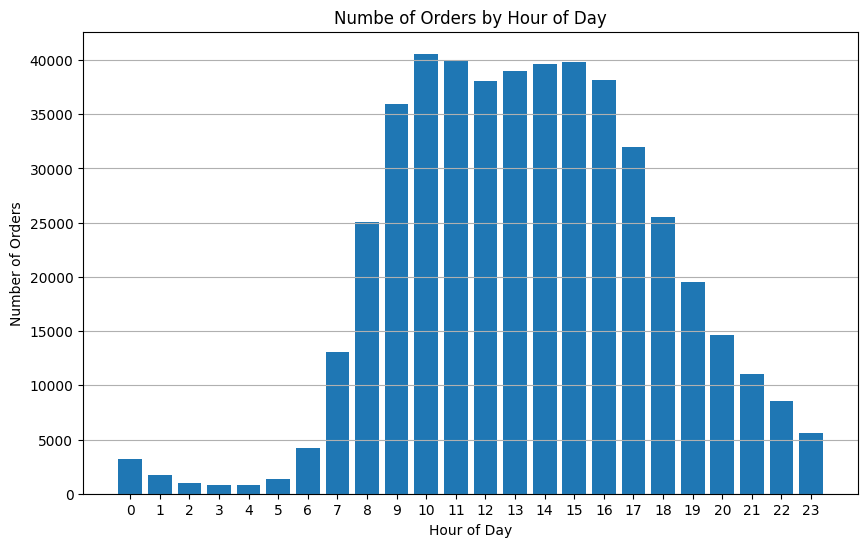

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

order_count_by_hour = instacart_orders.groupby('order_hour_of_day').size()
plt.figure(figsize=(10,6))
plt.bar(order_count_by_hour.index, order_count_by_hour.values)
plt.title('Numbe of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.grid(True, axis='y')
plt.xticks(range(24))
plt.show()

#The most popular times of the day that people shop for groceries are between 10-12 am and between 2-4 pm.

### [A3] What day of the week do people shop for groceries?

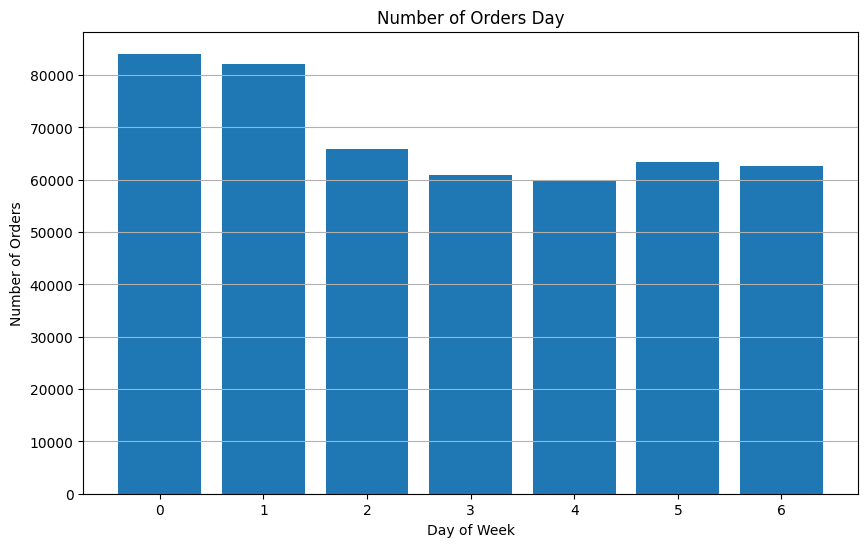

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

order_count_by_day_of_week = instacart_orders.groupby('order_dow').size()
plt.figure(figsize=(10,6))
plt.bar(order_count_by_day_of_week.index, order_count_by_day_of_week.values)
plt.title('Number of Orders Day')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.grid(True, axis='y')
plt.xticks(range(7))
plt.show()

In [ ]:
#The most popular day of the week for people to shop for groceries is Sunday, the 2nd most popular is Monday.

### [A4] How long do people wait until placing another order?

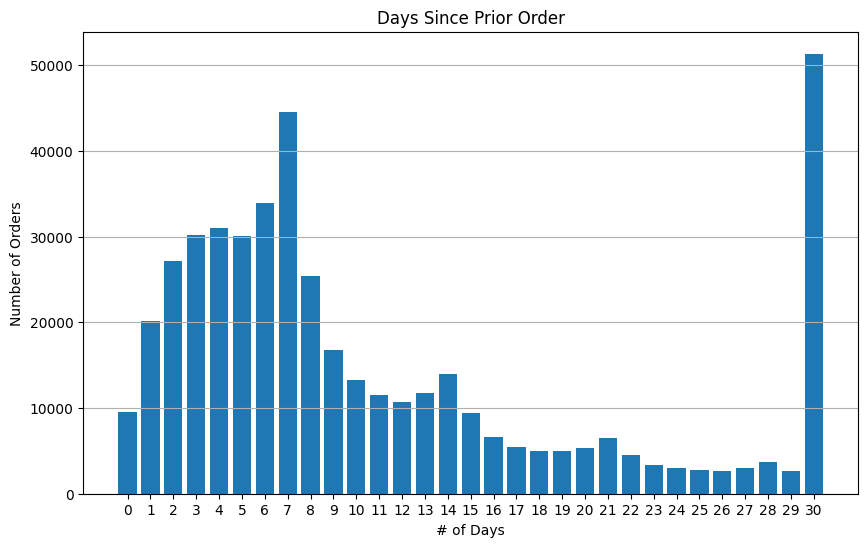

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

days_since_prior_order_sum = instacart_orders.groupby('days_since_prior_order').size()
plt.figure(figsize=(10,6))
plt.bar(days_since_prior_order_sum.index, days_since_prior_order_sum.values)
plt.title('Days Since Prior Order')
plt.xlabel('# of Days')
plt.ylabel('Number of Orders')
plt.grid(True, axis='y')
plt.xticks(range(31))
plt.show()

In [ ]:
#A lot of people wait 30 days to place another order but that could just be because the data stops at 30 and does not go higher.
#If you exlude the outlier of 30 from the data the most popular reorder times are 7 then 6 days.

In [37]:
days_since_prior_order_min = instacart_orders['days_since_prior_order'].min()
days_since_prior_order_max = instacart_orders['days_since_prior_order'].max()
print(f"The minimum number of days since prior order is {days_since_prior_order_min}")
print(f"The maximum number of days since prior order is {days_since_prior_order_max}")

The minimum number of days since prior order is 0.0
The maximum number of days since prior order is 30.0


# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [38]:
wednesday_orders = instacart_orders[instacart_orders['order_dow'] == 3]
saturday_orders = instacart_orders[instacart_orders['order_dow'] == 6]

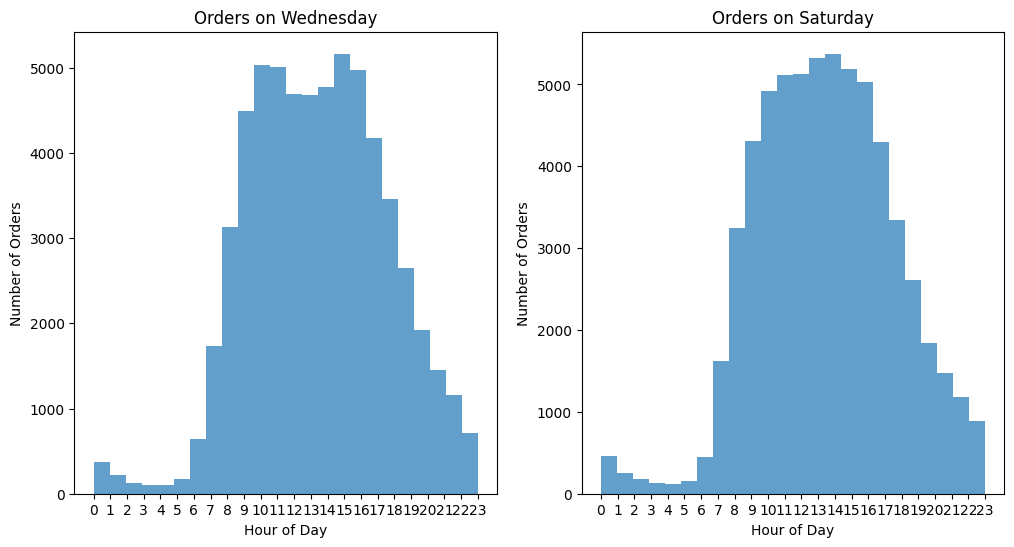

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.hist(wednesday_orders['order_hour_of_day'], bins=24, range=(0, 23), alpha=0.7)
plt.title('Orders on Wednesday')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))

plt.subplot(1, 2, 2)
plt.hist(saturday_orders['order_hour_of_day'], bins=24, range=(0, 23), alpha=0.7)
plt.title('Orders on Saturday')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.show()


In [40]:
#The distribution on the timing of orders is fairly similar but there is still two noticeable differences.
#The first being that around lunch time (between noon and 2pm) there is usually a fall of on orders on Wednesday's.
#On Saturday's it is the opposite, between noon and 2pm is peak order time.
#Also on Saturday nights there is a more orders taking place late at night than on Wednesday nights.

### [B2] What's the distribution for the number of orders per customer?

In [41]:
orders_per_customer = instacart_orders.groupby('user_id').size()
orders_distribution = orders_per_customer.value_counts().sort_index()

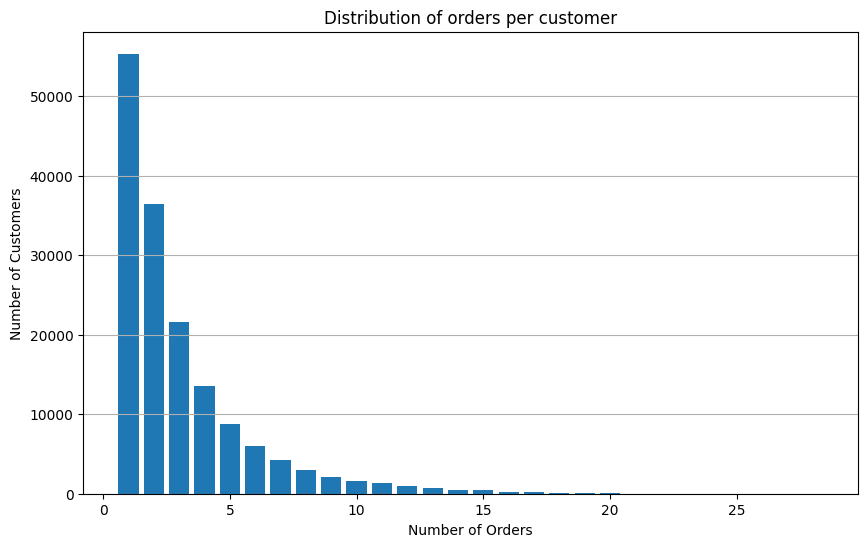

In [42]:
plt.figure(figsize=(10,6))
plt.bar(orders_distribution.index, orders_distribution.values)
plt.title('Distribution of orders per customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(True, axis='y')
plt.show()

### [B3] What are the top 20 popular products (display their id and name)?

In [43]:
product_order_count = order_products.groupby('product_id').size().reset_index(name='order_count')
top_20_products = product_order_count.sort_values(by='order_count', ascending=False).head(20)

In [44]:
top_20_products = top_20_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')

In [45]:
print(top_20_products)

    product_id  order_count              product_name
0        24852        66050                    Banana
1        13176        53297    Bag of Organic Bananas
2        21137        37039      Organic Strawberries
3        21903        33971      Organic Baby Spinach
4        47209        29773      Organic Hass Avocado
5        47766        24689           Organic Avocado
6        47626        21495               Large Lemon
7        16797        20018              Strawberries
8        26209        19690                     Limes
9        27845        19600        Organic Whole Milk
10       27966        19197       Organic Raspberries
11       22935        15898      Organic Yellow Onion
12       24964        15292            Organic Garlic
13       45007        14584          Organic Zucchini
14       39275        13879       Organic Blueberries
15       49683        13675            Cucumber Kirby
16       28204        12544        Organic Fuji Apple
17        5876        12232 

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [46]:
items_per_order = order_products.groupby('order_id').size()
mean_items = items_per_order.mean()
median_items = items_per_order.median()
print(f"Mean number of items per order: {mean_items}")
print(f"Median number of items per order: {median_items}")

Mean number of items per order: 10.098983215049127
Median number of items per order: 8.0


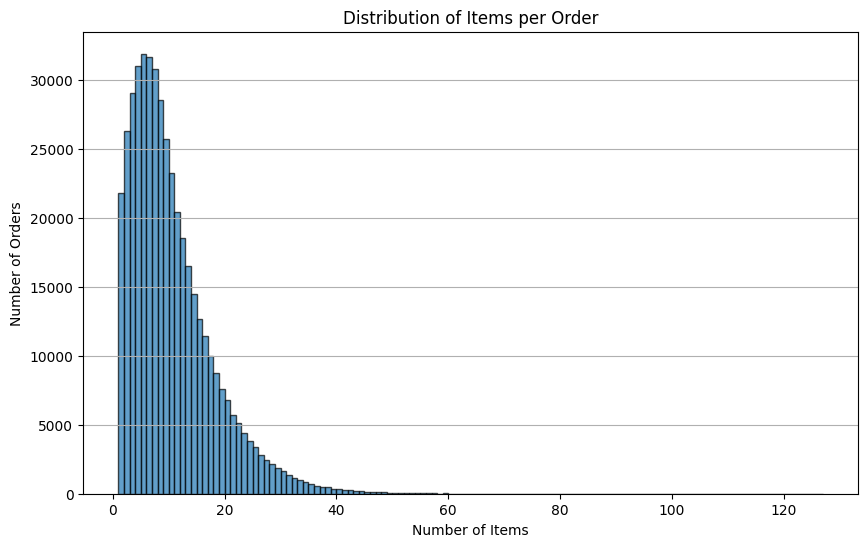

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(items_per_order, bins=range(1, items_per_order.max() +1), edgecolor='black', alpha=0.7)
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.grid(True, axis='y')
plt.show()

In [48]:
#The mean number of products per order is slightly above 10 while the median is 8.
#The distribution looks like a log normal distribution, rising slightly to start from 0 to 5 products
#then falling exponentially from there.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [49]:
reordered_products = order_products[order_products['reordered'] == 1]


In [50]:
reorder_count = reordered_products.groupby('product_id').size().reset_index(name='reorder_count')


In [51]:
top_20_reordered_products = reorder_count.sort_values(by='reorder_count', ascending=False).head(20)
top_20_reordered_products = top_20_reordered_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')


In [52]:
print(top_20_reordered_products)

    product_id  reorder_count              product_name
0        24852          55763                    Banana
1        13176          44450    Bag of Organic Bananas
2        21137          28639      Organic Strawberries
3        21903          26233      Organic Baby Spinach
4        47209          23629      Organic Hass Avocado
5        47766          18743           Organic Avocado
6        27845          16251        Organic Whole Milk
7        47626          15044               Large Lemon
8        27966          14748       Organic Raspberries
9        16797          13945              Strawberries
10       26209          13327                     Limes
11       22935          11145      Organic Yellow Onion
12       24964          10411            Organic Garlic
13       45007          10076          Organic Zucchini
14       49683           9538            Cucumber Kirby
15       28204           8989        Organic Fuji Apple
16        8277           8836  Apple Honeycrisp 

### [C3] For each product, what proportion of its orders are reorders?

In [53]:
product_order_count = order_products.groupby('product_id').size().reset_index(name='order_count')
top_products = product_order_count.sort_values(by='order_count', ascending=False)
top_products = top_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')

reordered_products = order_products[order_products['reordered'] == 1]
reorder_count = reordered_products.groupby('product_id').size().reset_index(name='reorder_count')
reordered_products = reorder_count.sort_values(by='reorder_count', ascending=False)
reordered_products = reordered_products.merge(products[['product_id', 'product_name']], on='product_id', how='left')


In [54]:
product_reorder_data = product_order_count.merge(reorder_count, on='product_id', how='left').fillna(0)
product_reorder_data['reorder_proportion'] = product_reorder_data['reorder_count'] / product_reorder_data['order_count']
product_reorder_data = product_reorder_data.merge(products[['product_id', 'product_name']], on='product_id', how='left')
print(product_reorder_data[['product_id', 'product_name', 'order_count', 'reorder_count', 'reorder_proportion']])

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               7                     Pure Coconut Water With Orange   
...           ...                                                ...   
45568       49690                      HIGH PERFORMANCE ENERGY DRINK   
45569       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
45570       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
45571       49693                             SPRING WATER BODY WASH   
45572       49694                            BURRITO- STEAK & CHEESE   

       order_count  reorder_count  reorder_proportion  
0              280          158.0            0.564286  
1               11     

In [ ]:
#Upload the dataframes. You can skip that step and use your own dataframes
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')

#Merge sales and products
reorder_pct = df_order_products.merge(df_products)

#Get the reorder ratio
reorder_pct = reorder_pct.groupby(['product_id', 'product_name'])['reordered'].mean().to_frame()

#Format the output
reorder_pct.head(20).style.format({'reordered': '{:.1%}'})

,,reordered
product_id,product_name,
1,Chocolate Sandwich Cookies,56.4%
2,All-Seasons Salt,0.0%
3,Robust Golden Unsweetened Oolong Tea,73.8%
4,Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce,51.0%
7,Pure Coconut Water With Orange,50.0%
8,Cut Russet Potatoes Steam N' Mash,31.6%
9,Light Strawberry Blueberry Yogurt,76.2%
10,Sparkling Orange Juice & Prickly Pear Beverage,44.8%
11,Peach Mango Juice,62.5%


#My ending analysis of the data would state that most orders during the day happen between 10am and 5pm.  Sunday and Monday are the most popular days of the week that orders are placed.  Customers usually wait 6-7 days to reorder but also a large amount of the group has 30 days waited.  That outlier could just be because of how the data is collected though.  Order times on the weekend are slightly different than order times during the week.  Peak hours are between 1pm and 4pm during the weekend while peak hours during the weekdays are between 10am-Noon and between 2pm and 5pm.  A majority of the customers have placed less than 3 orders.  The majority of orders are for between 3 and 8 items.